In [2]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

rank = [0, 1]
step = list(range(28))
layer = list(range(57))
type = ["kbase", "vbase", "q", "k", "v", "latents"]

# k base store in results/collector/rank_{rank}/step_{step}/layer_{layer}/kbase.pt
# v base store in results/collector/rank_{rank}/step_{step}/layer_{layer}/vbase.pt
# q store in results/collector/rank_{rank}/step_{step}/layer_{layer}/q.pt
# k store in results/collector/rank_{rank}/step_{step}/layer_{layer}/k.pt
# v store in results/collector/rank_{rank}/step_{step}/layer_{layer}/v.pt
# latents store in results/collector/rank_{rank}/step_{step}/latents.pt


In [ ]:
# Define paths
original_path = "results/collector_original"
naive_path = "results/collector_naive"
wo_residual_path = "results/collector_wo_ef"
w_residual_path = "results/collector_w_ef"
rank = 1  # Example rank
layer = 25  # Example layer
steps = list(range(28))  # Example steps

# Load data for a specific layer across different steps
k_data = []
k_data_2 = []
k_data_3 = []
k_data_4 = []
v_data = []
v_data_2 = []
v_data_3 = []
v_data_4 = []

for step in steps:
    k_path = os.path.join(naive_path, f"rank_{rank}/step_{step}/layer_{layer}/k.pt")
    v_path = os.path.join(naive_path, f"rank_{rank}/step_{step}/layer_{layer}/v.pt")
    k_path_2 = os.path.join(wo_residual_path, f"rank_{rank}/step_{step}/layer_{layer}/k.pt")
    v_path_2 = os.path.join(wo_residual_path, f"rank_{rank}/step_{step}/layer_{layer}/v.pt")
    k_path_3 = os.path.join(w_residual_path, f"rank_{rank}/step_{step}/layer_{layer}/k.pt")
    v_path_3 = os.path.join(w_residual_path, f"rank_{rank}/step_{step}/layer_{layer}/v.pt")
    k_path_4 = os.path.join(original_path, f"rank_{rank}/step_{step}/layer_{layer}/k.pt")
    v_path_4 = os.path.join(original_path, f"rank_{rank}/step_{step}/layer_{layer}/v.pt")
    
    k_data.append(torch.load(k_path).numpy().flatten())
    v_data.append(torch.load(v_path).numpy().flatten())
    k_data_2.append(torch.load(k_path_2).numpy().flatten())
    v_data_2.append(torch.load(v_path_2).numpy().flatten())
    k_data_3.append(torch.load(k_path_3).numpy().flatten())
    v_data_3.append(torch.load(v_path_3).numpy().flatten())
    k_data_4.append(torch.load(k_path_4).numpy().flatten())
    v_data_4.append(torch.load(v_path_4).numpy().flatten())

# Convert to numpy arrays
k_data = np.array(k_data)
v_data = np.array(v_data)
k_data_2 = np.array(k_data_2)   
v_data_2 = np.array(v_data_2)
k_data_3 = np.array(k_data_3)
v_data_3 = np.array(v_data_3)
k_data_4 = np.array(k_data_4)
v_data_4 = np.array(v_data_4)

# Combine all K data for fitting PCA
combined_k_data = np.vstack([k_data, k_data_2, k_data_3, k_data_4])

# Perform PCA on combined data to get a common projection space
pca_k = PCA(n_components=2)

# Fit PCA on combined data
pca_k.fit(combined_k_data)

# Transform each dataset using the same PCA model
k_pca = pca_k.transform(k_data)
k_pca_2 = pca_k.transform(k_data_2)
k_pca_3 = pca_k.transform(k_data_3)
k_pca_4 = pca_k.transform(k_data_4)


# Plotting
plt.figure(figsize=(12, 3))

cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=min(steps), vmax=max(steps))

# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))

# Subplot 1: K V for original and naive
scatter1 = ax1.scatter(k_pca_4[:, 0], k_pca_4[:, 1], c=steps, cmap='viridis', marker='o', label='Original')
scatter3 = ax1.scatter(k_pca[:, 0], k_pca[:, 1], c=steps, cmap='viridis', marker='^', label='Naive Compression')

for i in range(len(k_pca_4) - 1):
    ax1.plot(k_pca_4[i:i+2, 0], k_pca_4[i:i+2, 1], '-', color=cmap(norm(steps[i])), alpha=0.5)

for i in range(len(k_pca) - 1):
    ax1.plot(k_pca[i:i+2, 0], k_pca[i:i+2, 1], '-', color=cmap(norm(steps[i])), alpha=0.5)

ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_xticks([])
ax1.set_yticks([])
fig.colorbar(scatter1, ax=ax1, label='Step')

# Subplot 2: K, V for original and without Error Feedback
scatter4 = ax2.scatter(k_pca_4[:, 0], k_pca_4[:, 1], c=steps, cmap='viridis', marker='o', label='Original')
scatter6 = ax2.scatter(k_pca_2[:, 0], k_pca_2[:, 1], c=steps, cmap='viridis', marker='s', label='Without ErrorFeedback')

# Plot segments for k_pca_4
for i in range(len(k_pca_4) - 1):
    ax2.plot(k_pca_4[i:i+2, 0], k_pca_4[i:i+2, 1], '-', color=cmap(norm(steps[i])), alpha=0.5)

# Plot segments for k_pca_2
for i in range(len(k_pca_2) - 1):
    ax2.plot(k_pca_2[i:i+2, 0], k_pca_2[i:i+2, 1], '-', color=cmap(norm(steps[i])), alpha=0.5)

ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_xticks([])
ax2.set_yticks([])
fig.colorbar(scatter4, ax=ax2, label='Step')

# Subplot 3: K, V for original and with Error Feedback
scatter8 = ax3.scatter(k_pca_4[:, 0], k_pca_4[:, 1], c=steps, cmap='viridis', marker='o', label='Original')
scatter10 = ax3.scatter(k_pca_3[:, 0], k_pca_3[:, 1], c=steps, cmap='viridis', marker='*', label='With ErrorFeedback')

for i in range(len(k_pca_4) - 1):
    ax3.plot(k_pca_4[i:i+2, 0], k_pca_4[i:i+2, 1], '-', color=cmap(norm(steps[i])), alpha=0.5)

for i in range(len(k_pca_3) - 1):
    ax3.plot(k_pca_3[i:i+2, 0], k_pca_3[i:i+2, 1], '-', color=cmap(norm(steps[i])), alpha=0.5)

ax3.set_xlabel('Principal Component 1')
ax3.set_ylabel('Principal Component 2')
ax3.set_xticks([])
ax3.set_yticks([])
fig.colorbar(scatter8, ax=ax3, label='Step')

all_handles, all_labels = [], []
for ax in [ax1, ax2, ax3]:
    h, l = ax.get_legend_handles_labels()
    all_handles.extend(h)
    all_labels.extend(l)

# Remove duplicate labels using a dictionary
by_label = dict(zip(all_labels, all_handles))
handles = list(by_label.values())
labels = list(by_label.keys())

fig.legend(handles, labels, prop={'size': 12}, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.10))
plt.tight_layout()
plt.show()


<Figure size 1200x300 with 0 Axes>

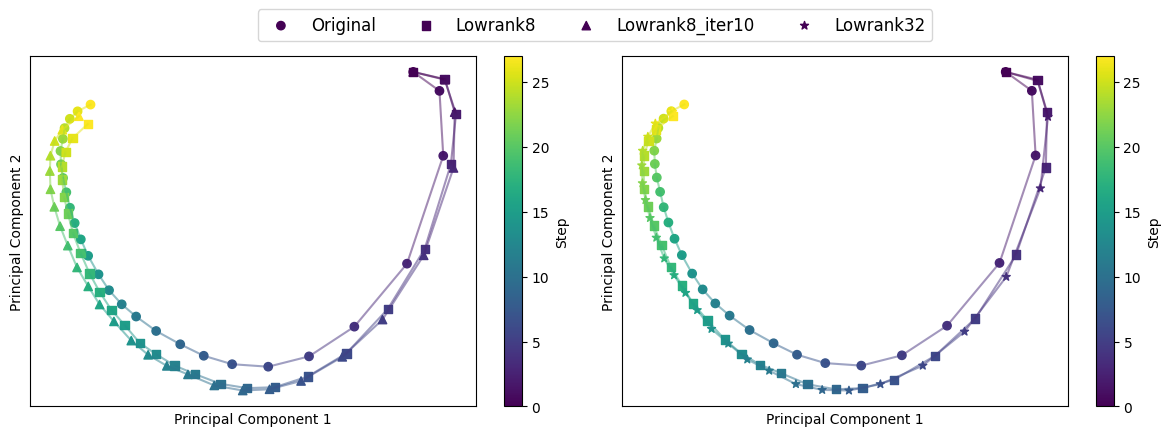

In [8]:
# Define paths
original_path = "../results/collector_original"
lowrank8_path = "../results/collector_lowrank8"
lowrank8_iter10_path = "../results/collector_lowrank8_iter10"
lowrank12_path = "../results/collector_lowrank12"
rank = 1  # Example rank
layer = 25  # Example layer
steps = list(range(28))  # Example steps

# Load data for a specific layer across different steps
k_data = []
k_data_2 = []
k_data_3 = []
k_data_4 = []
v_data = []
v_data_2 = []
v_data_3 = []
v_data_4 = []

for step in steps:
    k_path = os.path.join(lowrank8_path, f"rank_{rank}/step_{step}/layer_{layer}/k.pt")
    v_path = os.path.join(lowrank8_path, f"rank_{rank}/step_{step}/layer_{layer}/v.pt")
    k_path_2 = os.path.join(lowrank8_iter10_path, f"rank_{rank}/step_{step}/layer_{layer}/k.pt")
    v_path_2 = os.path.join(lowrank8_iter10_path, f"rank_{rank}/step_{step}/layer_{layer}/v.pt")
    k_path_3 = os.path.join(lowrank12_path, f"rank_{rank}/step_{step}/layer_{layer}/k.pt")
    v_path_3 = os.path.join(lowrank12_path, f"rank_{rank}/step_{step}/layer_{layer}/v.pt")
    k_path_4 = os.path.join(original_path, f"rank_{rank}/step_{step}/layer_{layer}/k.pt")
    v_path_4 = os.path.join(original_path, f"rank_{rank}/step_{step}/layer_{layer}/v.pt")
    
    k_data.append(torch.load(k_path).numpy().flatten())
    v_data.append(torch.load(v_path).numpy().flatten())
    k_data_2.append(torch.load(k_path_2).numpy().flatten())
    v_data_2.append(torch.load(v_path_2).numpy().flatten())
    k_data_3.append(torch.load(k_path_3).numpy().flatten())
    v_data_3.append(torch.load(v_path_3).numpy().flatten())
    k_data_4.append(torch.load(k_path_4).numpy().flatten())
    v_data_4.append(torch.load(v_path_4).numpy().flatten())

# Convert to numpy arrays
k_data = np.array(k_data)
v_data = np.array(v_data)
k_data_2 = np.array(k_data_2)   
v_data_2 = np.array(v_data_2)
k_data_3 = np.array(k_data_3)
v_data_3 = np.array(v_data_3)
k_data_4 = np.array(k_data_4)
v_data_4 = np.array(v_data_4)

# Combine all K data for fitting PCA
combined_k_data = np.vstack([k_data, k_data_2, k_data_3, k_data_4])
combined_v_data = np.vstack([v_data, v_data_2, v_data_3, v_data_4])

# Perform PCA on combined data to get a common projection space
pca_k = PCA(n_components=2)
pca_v = PCA(n_components=2)

# Fit PCA on combined data
pca_k.fit(combined_k_data)
pca_v.fit(combined_v_data)

# Transform each dataset using the same PCA model
k_pca = pca_k.transform(k_data)
k_pca_2 = pca_k.transform(k_data_2)
k_pca_3 = pca_k.transform(k_data_3)
k_pca_4 = pca_k.transform(k_data_4)

v_pca = pca_v.transform(v_data)
v_pca_2 = pca_v.transform(v_data_2)
v_pca_3 = pca_v.transform(v_data_3)
v_pca_4 = pca_v.transform(v_data_4)

# Plotting
plt.figure(figsize=(12, 3))

cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=min(steps), vmax=max(steps))

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Subplot 1: K for iter of original, lowrank8, lowrank8_iter10
scatter1 = ax1.scatter(v_pca_4[:, 0], v_pca_4[:, 1], c=steps, cmap='viridis', marker='o', label='Original')
scatter2 = ax1.scatter(v_pca[:, 0], v_pca[:, 1], c=steps, cmap='viridis', marker='s', label='Lowrank8')
scatter3 = ax1.scatter(v_pca_2[:, 0], v_pca_2[:, 1], c=steps, cmap='viridis', marker='^', label='Lowrank8_iter10')

for i in range(len(v_pca_4) - 1):
    ax1.plot(v_pca_4[i:i+2, 0], v_pca_4[i:i+2, 1], '-', color=cmap(norm(steps[i])), alpha=0.5)

for i in range(len(v_pca) - 1):
    ax1.plot(v_pca[i:i+2, 0], v_pca[i:i+2, 1], '-', color=cmap(norm(steps[i])), alpha=0.5)

for i in range(len(v_pca_2) - 1):
    ax1.plot(v_pca_2[i:i+2, 0], v_pca_2[i:i+2, 1], '-', color=cmap(norm(steps[i])), alpha=0.5)

ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_xticks([])
ax1.set_yticks([])
fig.colorbar(scatter1, ax=ax1, label='Step')

# Subplot 2: K for iter of original, lowrank8, lowrank121
scatter4 = ax2.scatter(v_pca_4[:, 0], v_pca_4[:, 1], c=steps, cmap='viridis', marker='o', label='Original')
scatter6 = ax2.scatter(v_pca_2[:, 0], v_pca_2[:, 1], c=steps, cmap='viridis', marker='s', label='Lowrank8')
scatter7 = ax2.scatter(v_pca_3[:, 0], v_pca_3[:, 1], c=steps, cmap='viridis', marker='*', label='Lowrank32')

# Plot segments for k_pca_4
for i in range(len(v_pca_4) - 1):
    ax2.plot(v_pca_4[i:i+2, 0], v_pca_4[i:i+2, 1], '-', color=cmap(norm(steps[i])), alpha=0.5)

# Plot segments for k_pca_2
for i in range(len(v_pca_2) - 1):
    ax2.plot(v_pca_2[i:i+2, 0], v_pca_2[i:i+2, 1], '-', color=cmap(norm(steps[i])), alpha=0.5)

# Plot segments for k_pca_3
for i in range(len(v_pca_3) - 1):
    ax2.plot(v_pca_3[i:i+2, 0], v_pca_3[i:i+2, 1], '-', color=cmap(norm(steps[i])), alpha=0.5)

ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_xticks([])
ax2.set_yticks([])
fig.colorbar(scatter4, ax=ax2, label='Step')

all_handles, all_labels = [], []
for ax in [ax1, ax2]:
    h, l = ax.get_legend_handles_labels()
    all_handles.extend(h)
    all_labels.extend(l)

# Remove duplicate labels using a dictionary
by_label = dict(zip(all_labels, all_handles))
handles = list(by_label.values())
labels = list(by_label.keys())

fig.legend(handles, labels, prop={'size': 12}, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.10))
plt.tight_layout()
plt.show()
